In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [7]:
df=pd.read_csv('Social_Network_Ads.csv')

In [8]:
{i:v for i,v in enumerate(df)}

{0: 'User ID', 1: 'Gender', 2: 'Age', 3: 'EstimatedSalary', 4: 'Purchased'}

In [9]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [10]:
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size =
0.7,random_state=33)

In [11]:
# Create a pipeline to create combinations of variables for the grid search:
pipeline = Pipeline([('clf', DecisionTreeClassifier(criterion='entropy')) ])

In [12]:
# Combinations to explore are given as parameters in Python dictionary format:
parameters = {
'clf__max_depth': (50,100,150),
'clf__min_samples_split': (2, 3),
'clf__min_samples_leaf': (1, 2, 3)
}

In [13]:
pipeline.steps

[('clf',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'))]

In [14]:
pipeline.named_steps

{'clf': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best')}

The n_jobs field is for selecting the number of cores in a computer; -1 means it uses all the
cores in the computer. The scoring methodology is accuracy, in which many other options
can be chosen, such as precision, recall, and f1:

In [15]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1,
scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='entropy',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                   

In [16]:
# Predict using the best parameters of grid search:
y_pred = grid_search.predict(X_test)

In [20]:
print ('\n Best score: \n', grid_search.best_score_)
print ('\n Best parameters set: \n')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
print ("\n Confusion Matrix on Test data\n",
       confusion_matrix(y_test,y_pred))
print ("\n Test Accuracy \n",
       accuracy_score(y_test,y_pred))
print ("\nPrecision Recall f1 table \n",
       classification_report(y_test,y_pred))


 Best score: 
 0.8928571428571429

 Best parameters set: 

	clf__max_depth: 50
	clf__min_samples_leaf: 3
	clf__min_samples_split: 3

 Confusion Matrix on Test data
 [[64 13]
 [ 1 42]]

 Test Accuracy 
 0.8833333333333333

Precision Recall f1 table 
               precision    recall  f1-score   support

           0       0.98      0.83      0.90        77
           1       0.76      0.98      0.86        43

    accuracy                           0.88       120
   macro avg       0.87      0.90      0.88       120
weighted avg       0.91      0.88      0.89       120



# Parallelism of Statistics and Machine Learning

## Assumptions of linear regression
### Linear regression has the following assumptions, failing which the linear regression model does not hold true:
- The dependent variable should be a linear combination of independent variables
- No autocorrelation in error terms
- Errors should have zero mean and be normally distributed
- No or little multi-collinearity
- Error terms should be homoscedastic

##### No autocorrelation in error terms: Presence of correlation in error terms penalized model accuracy.
###### How to diagnose: Look for the Durbin-Watson test. Durbin-Watson's d tests the null hypothesis that the residuals are not linearly auto correlated. While d can lie between 0 and 4, if d ≈ 2 indicates no autocorrelation, 0<d<2 implies positive autocorrelation, and 2<d<4 indicates negative autocorrelation.

# No or little multi-collinearity: 
Multi-collinearity is the case in which
independent variables are correlated with each other and this situation creates
unstable models by inflating the magnitude of coefficients/estimates. It also
becomes difficult to determine which variable is contributing to predict the
response variable. VIF is calculated for each independent variable by calculating
the R-squared value with respect to all the other independent variables and tries
to eliminate which variable has the highest VIF value one by one:
### How to diagnose: Look into scatter plots, run correlation coefficient on all the variables of data. Calculate the variance inflation factor (VIF). If VIF <= 4 suggests no multi-collinearity, in banking scenarios, people use VIF <= 2 also!

# Steps applied in linear regression modeling
The following steps are applied in linear regression modeling in industry:
1. Missing value and outlier treatment
2. Correlation check of independent variables
3. Train and test random classification
4. Fit the model on train data
5. Evaluate model on test data

# Example of simple linear regression using the wine quality data
In the wine quality data, the dependent variable (Y) is wine quality and the independent (X)
variable we have chosen is alcohol content. We are testing here whether there is any
significant relation between both, to check whether a change in alcohol percentage is the
deciding factor in the quality of the wine:

In [21]:
from sklearn.metrics import r2_score

In [34]:
wine_quality = pd.read_csv(r"C:\Users\Admin\Downloads\winequality-red.csv",sep=';')

In [35]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
wine_quality.rename(columns=lambda x: x.replace(" ", "_"),inplace=True) # TO replace _ between words

In [24]:
wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
wine_quality.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
x_train,x_test,y_train,y_test = train_test_split (wine_quality['alcohol'], 
                                                  wine_quality["quality"],
                                                  train_size = 0.7,
                                                  random_state=42)

In [28]:
#After splitting a single variable out of the DataFrame, it becomes a pandas series, hence we need to convert it back into a pandas DataFrame again:
x_train = pd.DataFrame(x_train);x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train);y_test = pd.DataFrame(y_test)

The following function is for calculating the mean from the columns of the DataFrame. The
mean was calculated for both alcohol (independent) and the quality (dependent)
variables:

In [31]:
def mean(values):
    return round(sum(values)/float(len(values)),2)
alcohol_mean = mean(x_train['alcohol'])
quality_mean = mean(y_train['quality'])

Variance and covariance is indeed needed for calculating the coefficients of the regression
model:

In [32]:
alcohol_variance = round(sum((x_train['alcohol'] - alcohol_mean)**2),2)
quality_variance = round(sum((y_train['quality'] - quality_mean)**2),2)
covariance = round(sum((x_train['alcohol'] - alcohol_mean) * (y_train['quality'] - quality_mean )),2)
b1 = covariance/alcohol_variance
b0 = quality_mean - b1*alcohol_mean
print ("\n\nIntercept (B0):",round(b0,4),"Co-efficient(B1):",round(b1,4))



Intercept (B0): 1.6918 Co-efficient(B1): 0.377


After computing coefficients, it is necessary to predict the quality variable, which will test
the quality of fit using R-squared value:

In [33]:
y_test["y_pred"] = pd.DataFrame(b0+b1*x_test['alcohol'])
R_sqrd = 1- ( sum((y_test['quality']-y_test['y_pred'])**2) /
sum((y_test['quality'] - mean(y_test['quality']))**2 ))
print ("Test R-squared value",round(R_sqrd,4))

Test R-squared value 0.185


From the test R-squared value, we can conclude that there is no strong relationship between
quality and alcohol variables in the wine data, as R-squared is less than 0.7.

# Example of multilinear regression - step-by-stepmethodology of model building

In this section, we actually show the approach followed by industry experts while modeling
using linear regression with sample wine data. The statmodels.api package has been
used for multiple linear regression demonstration purposes instead of scikit-learn, due to
the fact that the former provides diagnostics on variables, whereas the latter only provides
final accuracy, and so on:

In [49]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
#wine_quality.rename(columns=lambda x: x.replace(" ", "_"), inplace=True) for replacing _ betweeen the words of col_name:
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [51]:
{i:v for i,v in enumerate(wine_quality)}

{0: 'fixed acidity',
 1: 'volatile acidity',
 2: 'citric acid',
 3: 'residual sugar',
 4: 'chlorides',
 5: 'free sulfur dioxide',
 6: 'total sulfur dioxide',
 7: 'density',
 8: 'pH',
 9: 'sulphates',
 10: 'alcohol',
 11: 'quality'}

In [55]:
eda_colnms = [ 'volatile acidity', 'chlorides', 'residual sugar', 'sulphates','free sulfur dioxide','alcohol','quality']

In [56]:
# Plots - pair plots
sns.set(style='whitegrid',context = 'notebook')

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


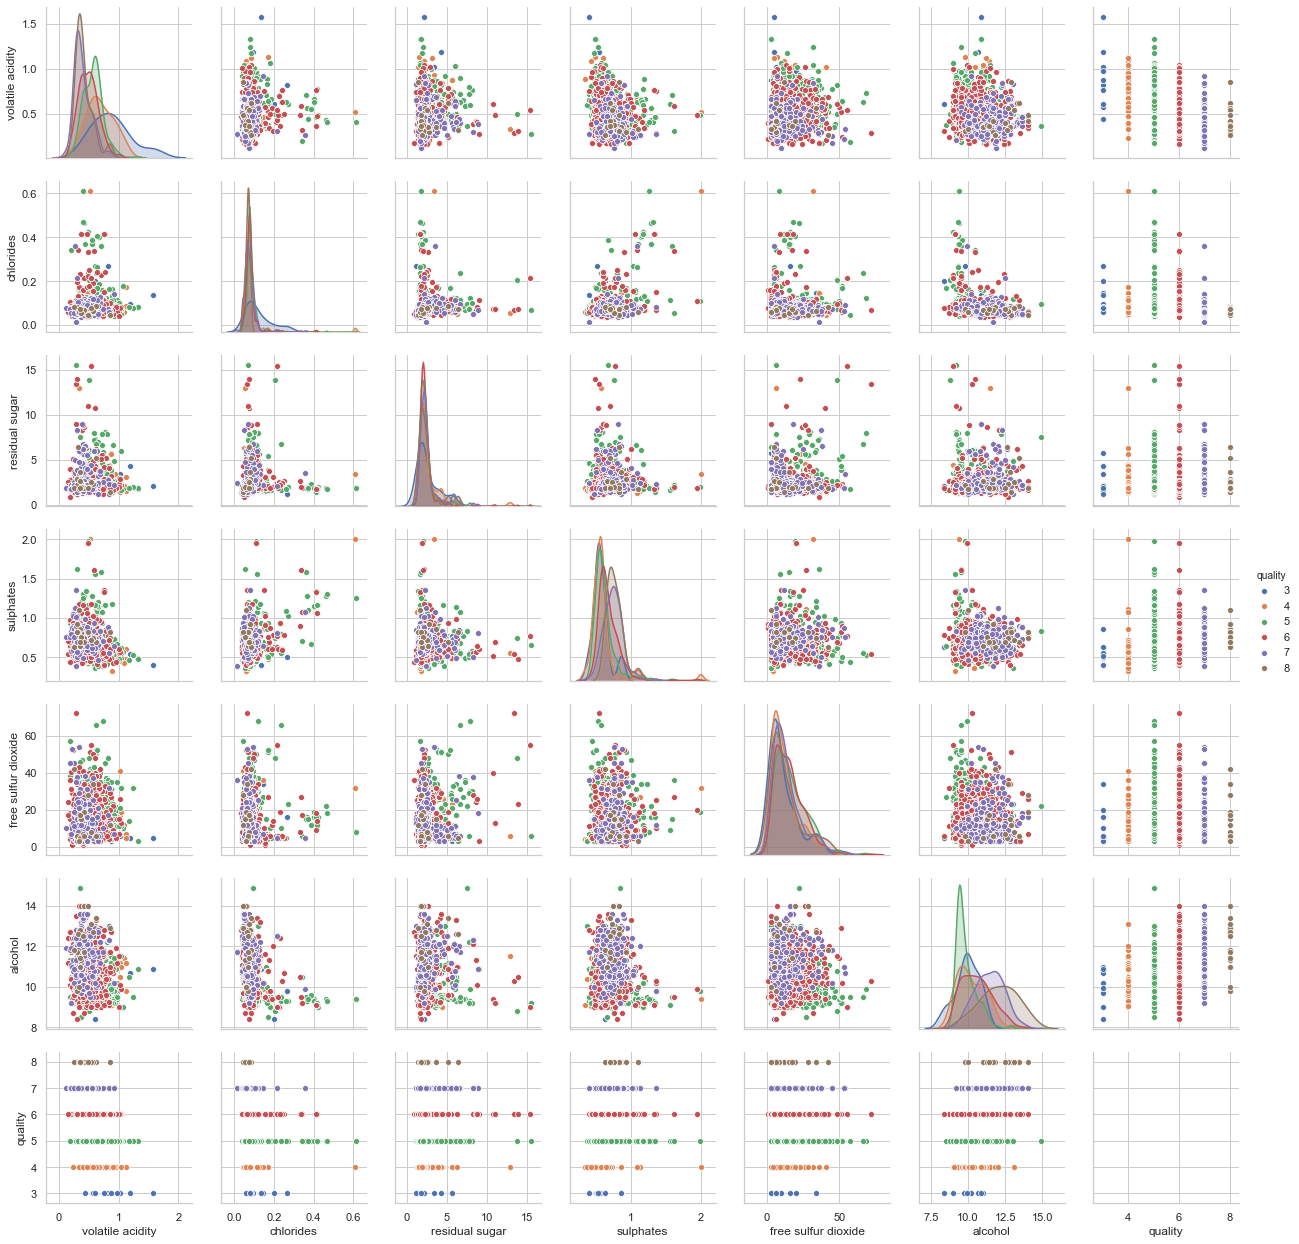

In [59]:
sns.pairplot(wine_quality[eda_colnms],size = 2.5,x_vars= eda_colnms,y_vars= eda_colnms,diag_kind='kde',hue='quality')
plt.show()

In addition to visual plots, correlation coefficients are calculated to show the level of
correlation in numeric terminology; these charts are used to drop variables in the initial
stage, if there are many of them to start with:

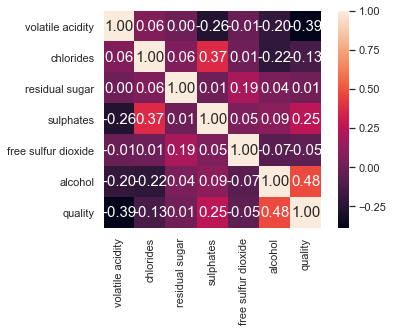

In [66]:
# Correlation coefficients
corr_mat = np.corrcoef(wine_quality[eda_colnms].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True,
                       square=True,fmt='.2f',
                       annot_kws={'size': 15}, 
                       yticklabels=eda_colnms,
                       xticklabels=eda_colnms)
plt.show();

# Backward and forward selection

There are various methods to add or remove variables to determine the best possible model.
In the backward method, iterations start with considering all the variables and we will
remove variables one by one until all the prescribed statistics are met (such as no
insignificance and multi-collinearity, and so on). Finally, the overall statistic will be
checked, such as if R-squared value is > 0.7 , it is considered a good model, else reject it. In
industry, practitioners mainly prefer to work on backward methods.
In the case of forward, we will start with no variables and keep on adding significant
variables until the overall model's fit improves.
In the following method, we have used the backward selection method, starting with all the
11 independent variables and removing them one by one from analysis after each iteration
(insignificant and multi-collinear variable):

In [99]:
colnms = ['volatile acidity', 'chlorides',
'total sulfur dioxide','pH', 'sulphates', 'alcohol'] 
# ITERation 1 = remove 'residual sugar' and run
# ITERation 2 = remove 'fixed acidity' & 'density'
# ITERation 3 = remove 'citric acid'
# ITERation 4 = remove 'free sulfur dioxide'

In [100]:
X = wine_quality[colnms]
y = wine_quality["quality"]

In [101]:
x_train,x_test,y_train,y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In the following code, adding constant means creating an intercept variable. If we do not
create an intercept, the coefficients will change accordingly:

In [102]:
import statsmodels.api as sm
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

In [103]:
# The following code creates a model summary including R-squared, adjusted R-squared, and the p-value of independent variables:
full_res = full_mod.fit()
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     103.1
Date:                Tue, 12 May 2020   Prob (F-statistic):          3.43e-103
Time:                        14:52:59   Log-Likelihood:                -1106.8
No. Observations:                1119   AIC:                             2228.
Df Residuals:                    1112   BIC:                             2263.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7

In [104]:
# The following code calculated VIF for all individual variables from first principles. 
# Here we are calculating the R-squared value for each variable and converting it into a VIF value:
print ("\nVariance Inflation Factor")
print ("----------------------------")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
----------------------------
volatile acidity 1.23
chlorides 1.317
total sulfur dioxide 1.066
pH 1.206
sulphates 1.321
alcohol 1.224


The key metrics to focus on while tuning the model are AIC, adjusted R-squared, individual variable's P>|t|, and VIF values (shown as follows). 
Any model would be considered as good to go having the following thumb rule criteria:
- AIC: No absolute value is significant. It is a relative measure, the lower the better.
- Adjusted R-squared: It is ≥ 0.7.
- Individual variable's p-value (P>|t|): It is ≤ 0.05.
- Individual variable's VIF: It is ≤ 5 (in the banking industry, at some places,people use ≤ 2 as well).

By looking into the preceding results, residual_sugar has highest the p-value of 0.668
and fixed_acidity has the highest VIF value of 7.189. In this situation, always first
remove the most insignificant variable, as insignificance is a more serious problem than
multi-collinearity, though both should be removed while reaching the final model.

Run the preceding code after removing the residual_sugar variable from the columns list; we get the following result from iteration 2:

## Run the preceding code after removing the residual_sugar variable from the columns list; we get the following result from iteration 1:
- AIC: Merely reduced from 2231 to 2229.
- Adjusted R-squared: Value did not change from 0.355.
- Individual variable's p-value (P>|t|): Density is still coming in as most insignificant with a value of 0.713.
- Individual variable's VIF: The fixed_acidity has the VIF ≥ 5. However, the density variable needs to be removed first, as priority is given to insignificance.

In [ ]:

                             OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     62.62
Date:                Tue, 12 May 2020   Prob (F-statistic):          1.12e-100
Time:                        14:39:46   Log-Likelihood:                -1103.6
No. Observations:                1119   AIC:                             2229.
Df Residuals:                    1108   BIC:                             2284.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3324     19.948      0.568      0.570     -27.807      50.472
fixed acidity            0.0175      0.027      0.645      0.519      -0.036       0.071
volatile acidity        -1.0997      0.145     -7.602      0.000      -1.384      -0.816
citric acid             -0.2417      0.176     -1.372      0.170      -0.587       0.104
chlorides               -1.6752      0.500     -3.349      0.001      -2.657      -0.694
free sulfur dioxide      0.0047      0.003      1.775      0.076      -0.000       0.010
total sulfur dioxide    -0.0033      0.001     -3.718      0.000      -0.005      -0.002
density                 -7.4762     20.356     -0.367      0.713     -47.416      32.464
pH                      -0.3524      0.214     -1.648      0.100      -0.772       0.067
sulphates                0.8010      0.132      6.049      0.000       0.541       1.061
alcohol                  0.2988      0.027     11.010      0.000       0.246       0.352
==============================================================================
Omnibus:                       27.765   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.597
Skew:                          -0.185   Prob(JB):                     4.62e-11
Kurtosis:                       3.940   Cond. No.                     8.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

Variance Inflation Factor
----------------------------
fixed acidity 5.707
volatile acidity 1.824
citric acid 3.118
chlorides 1.463
free sulfur dioxide 1.942
total sulfur dioxide 2.204
density 3.691
pH 2.852
sulphates 1.368
alcohol 2.176

# Run the preceding code after removing the 'fixed acidity' & 'density' variable from the columns list; we get the following result from iteration 2:

In [ ]:

                             OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     78.33
Date:                Tue, 12 May 2020   Prob (F-statistic):          1.77e-102
Time:                        14:45:59   Log-Likelihood:                -1103.8
No. Observations:                1119   AIC:                             2226.
Df Residuals:                    1110   BIC:                             2271.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2723      0.553      7.727      0.000       3.187       5.357
volatile acidity        -1.0877      0.139     -7.847      0.000      -1.360      -0.816
citric acid             -0.1945      0.147     -1.327      0.185      -0.482       0.093
chlorides               -1.7561      0.483     -3.633      0.000      -2.705      -0.808
free sulfur dioxide      0.0048      0.003      1.834      0.067      -0.000       0.010
total sulfur dioxide    -0.0034      0.001     -4.067      0.000      -0.005      -0.002
pH                      -0.4444      0.159     -2.800      0.005      -0.756      -0.133
sulphates                0.7954      0.130      6.107      0.000       0.540       1.051
alcohol                  0.3042      0.021     14.647      0.000       0.263       0.345
==============================================================================
Omnibus:                       26.793   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.404
Skew:                          -0.181   Prob(JB):                     1.38e-10
Kurtosis:                       3.918   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

Variance Inflation Factor
----------------------------
volatile acidity 1.677
citric acid 2.161
chlorides 1.368
free sulfur dioxide 1.929
total sulfur dioxide 2.028
pH 1.573
sulphates 1.325
alcohol 1.276

# Run the preceding code after removing the 'fixed acidity' & 'density' variable from the columns list; we get the following result from iteration 3:

In [ ]:
  OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Tue, 12 May 2020   Prob (F-statistic):          4.31e-103
Time:                        14:49:44   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9210      0.486      8.074      0.000       2.968       4.874
volatile acidity        -0.9941      0.119     -8.327      0.000      -1.228      -0.760
chlorides               -1.8800      0.474     -3.963      0.000      -2.811      -0.949
free sulfur dioxide      0.0054      0.003      2.075      0.038       0.000       0.010
total sulfur dioxide    -0.0036      0.001     -4.395      0.000      -0.005      -0.002
pH                      -0.3469      0.141     -2.465      0.014      -0.623      -0.071
sulphates                0.7872      0.130      6.049      0.000       0.532       1.043
alcohol                  0.2987      0.020     14.672      0.000       0.259       0.339
==============================================================================
Omnibus:                       27.862   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.326
Skew:                          -0.189   Prob(JB):                     5.29e-11
Kurtosis:                       3.934   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

# Run the preceding code after removing the 'fixed acidity' & 'density' variable from the columns list; we get the following result from iteration 4:

In [ ]:
 OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     103.1
Date:                Tue, 12 May 2020   Prob (F-statistic):          3.43e-103
Time:                        14:52:59   Log-Likelihood:                -1106.8
No. Observations:                1119   AIC:                             2228.
Df Residuals:                    1112   BIC:                             2263.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7972      0.483      7.867      0.000       2.850       4.744
volatile acidity        -1.0196      0.119     -8.573      0.000      -1.253      -0.786
chlorides               -1.8723      0.475     -3.941      0.000      -2.805      -0.940
total sulfur dioxide    -0.0025      0.001     -4.052      0.000      -0.004      -0.001
pH                      -0.3015      0.139     -2.165      0.031      -0.575      -0.028
sulphates                0.7950      0.130      6.103      0.000       0.539       1.051
alcohol                  0.2999      0.020     14.715      0.000       0.260       0.340
==============================================================================
Omnibus:                       27.842   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.063
Skew:                          -0.199   Prob(JB):                     9.94e-11
Kurtosis:                       3.911   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


Variance Inflation Factor
----------------------------
volatile acidity 1.23
chlorides 1.317
total sulfur dioxide 1.066
pH 1.206
sulphates 1.321
alcohol 1.224

# Example of ridge regression machine learning

In [105]:
from sklearn.linear_model import Ridge


In [106]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [108]:
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [109]:
all_colnms=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [110]:
X = wine_quality[all_colnms]
y= wine_quality["quality"]

In [111]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size =0.7,random_state=42)

In [112]:
# A simple version of a grid search from scratch is described as follows, in which various values of alphas are to be tested in a grid search to test the model's fitness:
alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10.0]

Initial values of R-squared are set to 0 in order to keep track of its updated value and to
print whenever the new value is greater than the existing value:

In [114]:
initrsq = 0
print ("\nRidge Regression: Best Parameters\n")
for alph in alphas:
    ridge_reg = Ridge(alpha=alph)
    ridge_reg.fit(x_train,y_train) 
    tr_rsqrd = ridge_reg.score(x_train,y_train)
    ts_rsqrd = ridge_reg.score(x_test,y_test)


Ridge Regression: Best Parameters



The following code always keeps track of the test R-squared value and prints if the new value is greater than the existing best value:

In [115]:
if ts_rsqrd > initrsq:
    print ("Lambda: ",alph,"Train R-Squared value:",
           round(tr_rsqrd,5),"Test R-squared value:",round(ts_rsqrd,5))
    initrsq = ts_rsqrd
# This is shown in the following screenshot:

Lambda:  10.0 Train R-Squared value: 0.35048 Test R-squared value: 0.33185


Also, please note that the test R-squared value generated from ridge regression is similar to
the value obtained from multiple linear regression (0.3519), but with no stress on the
diagnostics of variables, and so on. Hence, machine learning models are relatively compact
and can be utilized for learning automatically without manual intervention to retrain the
model; this is one of the biggest advantages of using ML models for deployment purposes.

# Example of lasso regression machine learning model
Lasso regression is a close cousin of ridge regression, in which absolute values of
coefficients are minimized rather than the square of values. By doing so, we eliminate some
insignificant variables, which are a very much compacted representation similar to OLS
methods.
The following implementation is similar to ridge regression apart from penalty application
on mod/absolute value of coefficients:

In [116]:
from sklearn.linear_model import Lasso

In [129]:
alphas_1 = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10.0]
initrsq_1 = 0
print ("\nLasso Regression: Best Parameters\n")
for alph in alphas_1:
    lasso_reg = Lasso(alpha=alph)
    lasso_reg.fit(x_train,y_train)
    tr_rsqrd = lasso_reg.score(x_train,y_train)
    ts_rsqrd = lasso_reg.score(x_test,y_test)
    if ts_rsqrd > initrsq_1:
        print("Lambda: ",alph,"Train R-Squared value:",
          round(tr_rsqrd,5),"Test R-squared value:",
          round(ts_rsqrd,5))
        initrsq_1 = ts_rsqrd
    


Lasso Regression: Best Parameters

Lambda:  0.0001 Train R-Squared value: 0.36101 Test R-squared value: 0.35057


In [131]:
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(x_train,y_train)
print ("\nRidge Regression coefficient values of Alpha = 0.001\n")
for i in range(11):
    print (all_colnms[i],": ",ridge_reg.coef_[i])
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)
print ("\nLasso Regression coefficient values of Alpha = 0.001\n")
for i in range(11):
    print(all_colnms[i],": ",lasso_reg.coef_[i])


Ridge Regression coefficient values of Alpha = 0.001

fixed acidity :  0.015506587508044107
volatile acidity :  -1.1050982354876904
citric acid :  -0.2487986553235121
residual sugar :  0.004018895392835191
chlorides :  -1.684383962086345
free sulfur dioxide :  0.0046369017109631405
total sulfur dioxide :  -0.003283767904105511
density :  -5.5672717468030894
pH :  -0.3624800172040029
sulphates :  0.8009191228025626
alcohol :  0.2999182442952099

Lasso Regression coefficient values of Alpha = 0.001

fixed acidity :  0.014149546369062422
volatile acidity :  -1.0906236090493848
citric acid :  -0.18529515004737027
residual sugar :  -0.00013661024678723296
chlorides :  -1.058775797041006
free sulfur dioxide :  0.0048316481751489865
total sulfur dioxide :  -0.0032672288559592293
density :  -0.0
pH :  -0.25690192587072963
sulphates :  0.694487540316411
alcohol :  0.3077561491242808


The following results show the coefficient values of both methods; the coefficient of density
has been set to 0 in lasso regression, whereas the density value is -5.5672 in ridge
regression; also, none of the coefficients in ridge regression are zero values: